In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [90]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [91]:
df=pd.read_csv('prepared_individual_data/Urti.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [92]:
df.head()

,Urti
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

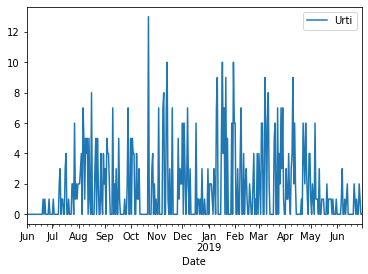

In [94]:
df.plot()

In [95]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

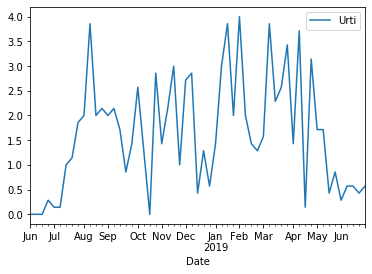

In [96]:
df_urti_weeklyM.plot()

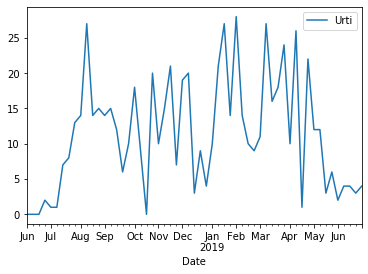

In [97]:
df_urti_weeklyS.plot()

In [98]:
df[10:].head(20)

,Urti
Date,
2018-06-11,0
2018-06-12,0
2018-06-13,0
2018-06-14,0
2018-06-15,0
2018-06-16,0
2018-06-17,0
2018-06-18,0
2018-06-19,0


In [99]:
df_urti_weeklyM.head(10)

,Urti
Date,
2018-06-03,0.000000
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,0.142857
2018-07-08,0.142857
2018-07-15,1.000000
2018-07-22,1.142857
2018-07-29,1.857143


In [100]:
df_diff=df.diff(1)

In [101]:
df_diff=df_diff[1:]

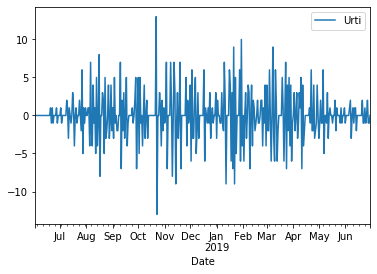

In [102]:
df_diff.plot()

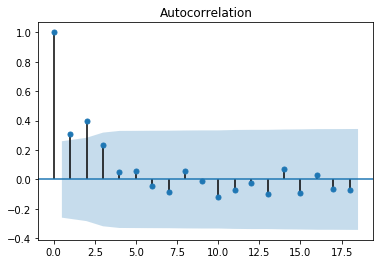

In [103]:
plot_acf(df_urti_weeklyM);

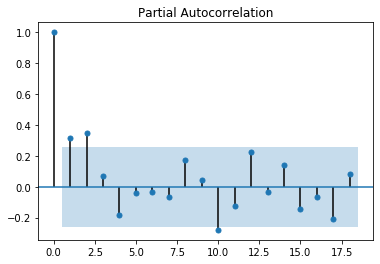

In [104]:
plot_pacf(df_urti_weeklyM);

# AR on weekly data with 1 time differencing

In [208]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

In [209]:
df_daily=df.diff(3)[3:]

In [210]:
df_weekly.head()

,Urti
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,-0.142857
2018-07-08,0.000000


In [211]:
df_daily.head()

,Urti
Date,
2018-06-04,0.0
2018-06-05,0.0
2018-06-06,0.0
2018-06-07,0.0
2018-06-08,0.0


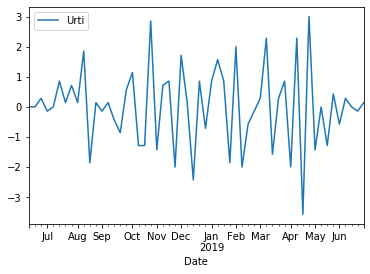

In [212]:
df_weekly.plot()

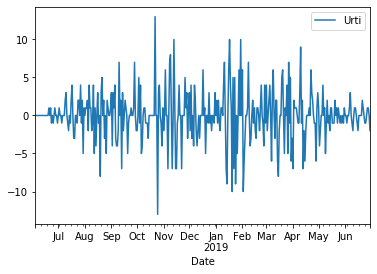

In [213]:
df_daily.plot()

In [214]:
df_weekly.size

56

In [215]:
df_daily.size

392

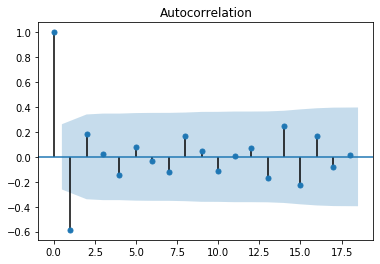

In [216]:
plot_acf(df_weekly);

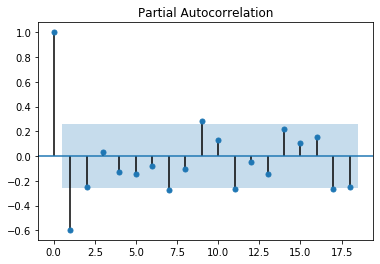

In [217]:
plot_pacf(df_weekly);

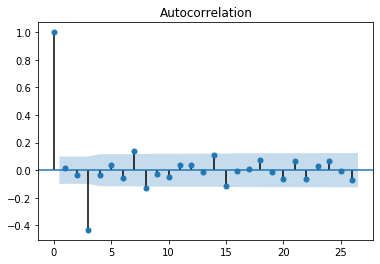

In [218]:
plot_acf(df_daily);

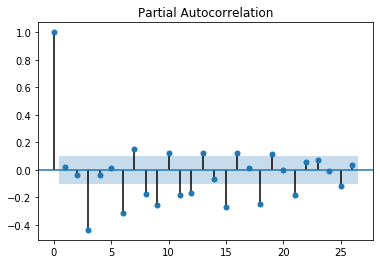

In [219]:
plot_pacf(df_daily);

In [220]:
total=df_weekly
test_size=int(0.20*total.size)
train_size=total.size-test_size

In [221]:
total_d=df_daily
test_size_d=int(0.20*total_d.size)
train_size_d=total_d.size-test_size_d

In [222]:
test_size

11

In [223]:
test_size_d

78

In [224]:
train_size

45

In [225]:
train_size_d

314

In [226]:
total.size

56

In [227]:
total_d.size

392

In [228]:
train=total[:train_size]

In [229]:
train_d=total_d[:train_size_d]

In [230]:
test=total[train_size:]

In [231]:
test_d=total_d[train_size_d:]

In [232]:
train.size+test.size

56

In [233]:
train_d.size+test_d.size

392

In [234]:
from statsmodels.tsa.arima_model import ARMA

In [235]:
arma_model=ARMA(train,order=(13,2))
arma_model_fit=arma_model.fit()

In [237]:
arma_model_d=ARMA(train_d,order=(0,9))
arma_model_fit_d=arma_model_d.fit()

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [238]:
arma_preds=arma_model_fit.predict(start=(train_size),end=(total.size-1))
arma_preds_d=arma_model_fit_d.predict(start=(train_size_d),end=(total_d.size-1))

In [239]:
arma_preds.size

11

In [240]:
arma_preds_d.size

78

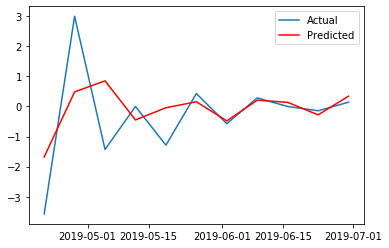

In [241]:
plt.plot(test,label='Actual')
plt.plot(arma_preds,color='red',label='Predicted')
plt.legend()

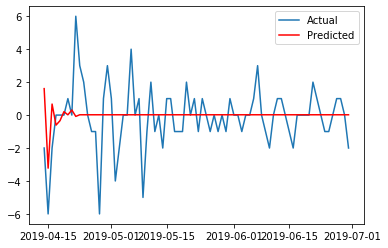

In [242]:
plt.plot(test_d,label='Actual')
plt.plot(arma_preds_d,color='red',label='Predicted')
plt.legend()

In [243]:
model_fit.aic

0.4378039059418743

In [244]:
arma_model_fit.aic

151.9723058578468

In [245]:
model.exog_names

['const',
 'L1.Urti',
 'L2.Urti',
 'L3.Urti',
 'L4.Urti',
 'L5.Urti',
 'L6.Urti',
 'L7.Urti',
 'L8.Urti',
 'L9.Urti',
 'L10.Urti']

In [246]:
model_fit.aic

0.4378039059418743

In [247]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acs

In [248]:
mse(y_true=test,y_pred=arma_preds)

1.5480648376364081

In [249]:
from statsmodels.tsa.ar_model import AR

In [250]:
model=AR(train)
model_fit=model.fit()

c:\program files\python36\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [254]:
model_d=AR(train_d)
model_fit_d=model_d.fit()

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [256]:
preds=model_fit.predict(start=(train_size),end=(total.size-1))
preds_d=model_fit_d.predict(start=(train_size_d),end=(total_d.size-1))

In [252]:
preds.size

11

In [257]:
preds_d.size

78

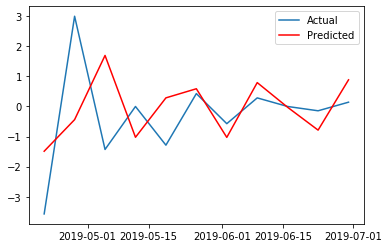

In [253]:
plt.plot(test,label='Actual')
plt.plot(preds,color='red',label='Predicted')
plt.legend()

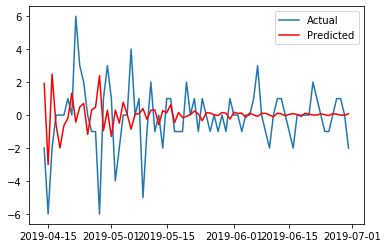

In [258]:
plt.plot(test_d,label='Actual')
plt.plot(preds_d,color='red',label='Predicted')
plt.legend()

# ARIMA model

In [ ]:
df_arima=df_urti_weeklyM

In [ ]:
df_arima.plot()

In [387]:
total=df_arima
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [388]:
test_size

14

In [389]:
train_size

43

In [390]:
total.size

57

In [426]:
train=total[:train_size]

In [427]:
test=total[train_size:]

In [428]:
train.size+test.size

57

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model=ARIMA(train,order=(1,1,1))

In [40]:
fit_model=model.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [452]:
fit_model.aic

127.2735997677336

In [453]:
preds=fit_model.forecast(steps=test_size)[0]

In [454]:
preds.size

14

In [455]:
test.size

14

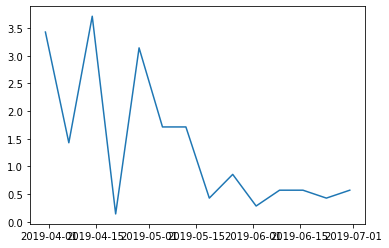

In [456]:
plt.plot(test)

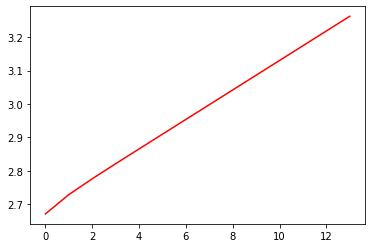

In [457]:
plt.plot(preds,color='red')

In [438]:
p=d=q=range(5)
import itertools

In [439]:
params=list(itertools.product(p,d,q))

In [442]:
len(params)

125

In [447]:
min_param=()
min_aic=300
import warnings as wngs
wngs.filterwarnings('ignore')
for par in params:
    try:
        model=ARIMA(train,order=(par[0],par[1],par[2]))
        model_fit=model.fit()
        aic=model_fit.aic
        if aic!=None and aic<min_aic:
            min_aic=aic
            min_param=par
    except:
        continue

In [448]:
min_param

(1, 1, 1)

In [449]:
min_aic

127.2735997677336

In [1]:
df_urti_weeklyM

NameError: name 'df_urti_weeklyM' is not defined

In [2]:
df_urti_weeklyM

NameError: name 'df_urti_weeklyM' is not defined